In [1]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


detected 18 sections


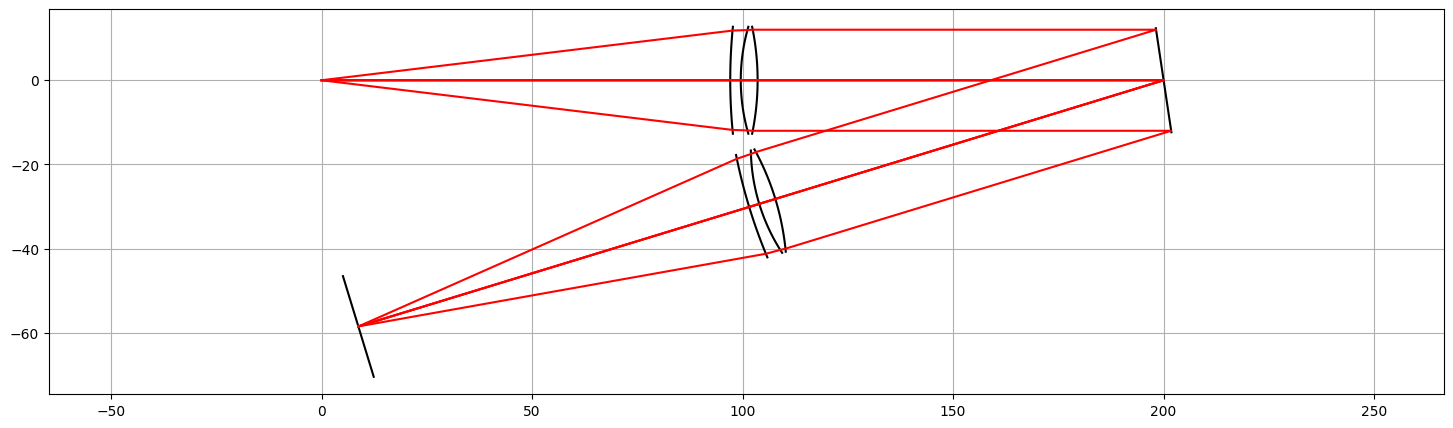

In [2]:
import pyoptic2 as pyo
from pyoptic2.util import zemax
from pyoptic2.display import plot2d, plot_system2d

# read a zemax lens description
# NB Does not support "black-box" lenses
example_dir = os.path.join(os.path.dirname(os.path.dirname(pyo.__file__)), 'examples')
AC254_100 = zemax.read_cached_zar(os.path.join(example_dir, 'AC254-100-A-Zemax.zar'))

# Alternatively, try and pull from the website (requires Requests, Beautifulsoup4, Lxml)
#AC254_100 = zemax.load_thorlabs_zar('AC254-100-A')

# Define a light source. We do this first, so we can use the on-axis (principle) ray to 
# determine the position of elements as we add them
# The Placement object takes a position (in mm) and a direction, which should be a norm-1 vector
src = pyo.PointSource('light source', pyo.Placement([0,0,0], [0,1,0]), NA=0.12, color=(1,0,0), wavelength=642.)
r = src.principle_ray #get the on-axis ray from the light source

# generate the system (basically just a container for surfaces)
s = pyo.System()

# Add elements
# the first argument to .add() is either an ElementGroup (ie a collection of optical surfaces)
# as is the case for the zemax objects, or a single Element (i.e. surface) - e.g. the mirror.
# the second argument [optional] is the ray you are using for layout. If provided, .add()
# propagates the ray up to and through the element, returning a new ray starting with the correct
# position and angle on the exit surface. This exiting ray can be used to locate the next element.
# Alternatively, fixed placements can be provided for each element and the ray ommitted.
lens1, r = s.add(AC254_100(r.prop(100), flip=True, f=100), r)
mirror1, r = s.add(pyo.Mirror.rotate_deg(r.prop(100), axis=[0,0,1],angle=-17.), r)
lens2, r = s.add(AC254_100(r.prop(100), flip=False, f=100), r)
cam, r = s.add(pyo.Mirror(r.prop(100), name='Camera'), r) #Screen/camera should really have it's own class, but we just need something flat to propagate to

# plot our optical system. This is a matplotlib plot, and you can use all the matplotlib plotting functions
# on top of the optical plots.
figure(figsize=(18,5))
plot_system2d(s, 'xy') #plot the system
plot2d(s.propagate(src.chief_rays), 'xy') #plot the on-axis, and extreme rays
#plot2d(s.propagate(src.pupil_rays), 'xy') #plot rays evenly distributed across the pupil
axis('equal')
grid()

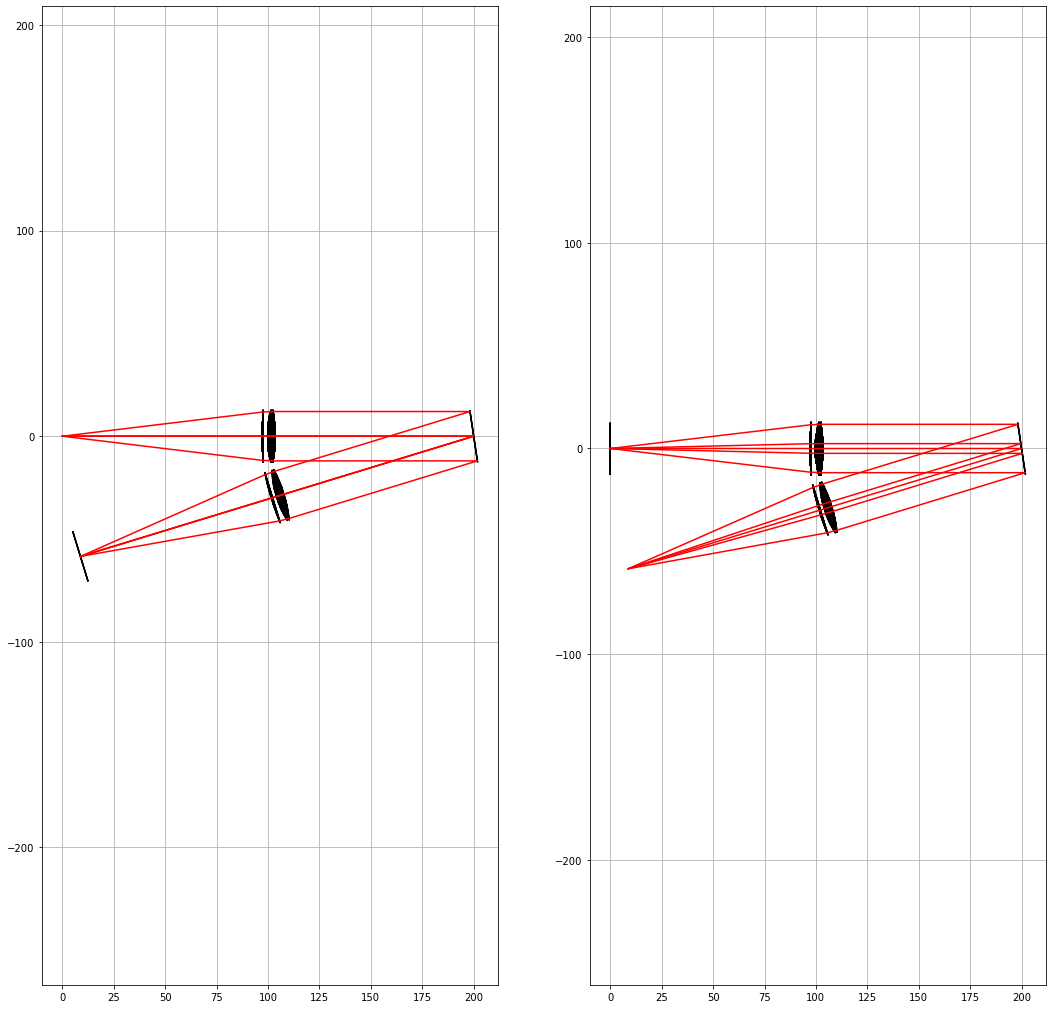

In [40]:
#reverse the system ...

# take all but the last element (the screen, which is where we are going to put our new source)
# reverse, and create a new system with the reversed elements
sr = pyo.System(s[:-1][::-1])
#add a new screen at the location of the previous source
sr.append(pyo.Mirror(src.placement, name='cam2'))
#add a new source at the location of the previous screen
src2 = pyo.PointSource('light source', pyo.Placement(r.p0, r.d), NA=0.12, color=(1,0,0))

figure(figsize=(18,18))
subplot(121)
plot_system2d(s, 'xy')
plot2d(s.propagate(src.chief_rays), 'xy')
axis('equal')
#ylim(90, 120)
grid()

subplot(122)
plot_system2d(sr, 'xy')
plot2d(sr.propagate(src2.chief_rays), 'xy')
axis('equal')
#ylim(90, 120)
grid()

In [ ]:
s[:-1][::-1]

In [3]:
pwd

'/Users/david'

In [4]:
__file__

NameError: name '__file__' is not defined

In [20]:
rb.cumulativePath

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

In [36]:
rb.propagate(rb.focus)

array([[ 0.00000000e+00,  3.00257775e+02,  0.00000000e+00],
       [ 5.90253467e-20,  3.00242525e+02, -9.09519358e-04],
       [-9.09519358e-04,  3.00242525e+02, -2.36101387e-19],
       [-1.18050693e-19,  3.00242525e+02,  9.09519358e-04],
       [ 9.09519358e-04,  3.00242525e+02,  2.95126733e-19],
       [ 0.00000000e+00,  3.00196751e+02, -2.40073057e-03],
       [-1.41111402e-03,  3.00196751e+02, -1.94223183e-03],
       [-2.28323045e-03,  3.00196751e+02, -7.41866544e-04],
       [-2.28323045e-03,  3.00196751e+02,  7.41866544e-04],
       [-1.41111402e-03,  3.00196751e+02,  1.94223183e-03],
       [-1.55814838e-19,  3.00196751e+02,  2.40073057e-03],
       [ 1.41111402e-03,  3.00196751e+02,  1.94223183e-03],
       [ 2.28323045e-03,  3.00196751e+02,  7.41866544e-04],
       [ 2.28323045e-03,  3.00196751e+02, -7.41866544e-04],
       [ 1.41111402e-03,  3.00196751e+02, -1.94223183e-03],
       [ 0.00000000e+00,  3.00120384e+02, -5.12240390e-03],
       [-2.08346937e-03,  3.00120384e+02